<a href="https://colab.research.google.com/github/Marytem/NSDUH_exploration/blob/master/final_datasets_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis
from mlxtend.plotting import plot_sequential_feature_selection
from matplotlib import pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [7]:
data = pd.read_csv('mode_imputed.csv')
data.isnull().values.ravel().sum(), data.shape

(0, (56897, 2223))

In [0]:
halucinogens = ['LSD', 'PCP','PEYOTE','MESC','PSILCY','ECST','KET','DMTAMTFXY','SALVIADIV']
inhalants = ['AMYLNIT', 'CLEFLU', 'GAS', 'GLUE', 'ETHER', 'SOLVENT', 'LGAS', 'NITOXID',
             'FELTMARKR', 'SPPAINT', 'AIRDUSTER', 'OTHAEROS']

In [0]:
prefixes = {}
prefixes['tobacco'] = 'CIG', 'CGR', 'CI3', 'PIP', 'SMK', 'TOB', 'CD'
prefixes['alcohol'] = ('AL')
prefixes['marijuana'] = 'MJ', 'MR'
prefixes['cocaine'] = 'COC', 'CC', 'CON'
prefixes['crack'] = 'CRK', 'CR' 
prefixes['heroin'] = 'HER', 'HR', 'HEO'
prefixes['hallucinogens'] = ['HAL']+halucinogens
prefixes['inhalants'] = ['INH']+inhalants
prefixes['methamphetamine'] = 'MET', 'ME'
prefixes['pain relievers'] = 'PNR', 'OXC'
prefixes['tranqualizers'] = ('TRQ')
prefixes['stimulants'] = 'SED', 'PSY'
prefixes['sedatives'] = ('STM')
prefixes['special drugs'] = 'COLD', 'GH', 'OT'
prefixes['general about drugs'] = ('GNN')
prefixes['targets'] = ['hal_user', 'inh_user', 'meth_user', 'pnr_user', 
                       'trq_user', 'stm_user', 'sed_user', 'cig_user',
                       'alc_user', 'mj_user', 'coc_user', 'crack_user',
                       'her_user']
drugs = ['hallucinogens', 'inhalants', 'methamphetamine', 'pain relievers',
         'tranqualizers', 'stimulants', 'sedatives', 'tobacco', 'alcohol',
         'marijuana', 'cocaine', 'crack', 'heroin']

In [10]:
drug_cols = []
for drug in prefixes.keys():
  drug_cols += [col for col in data.columns if col.startswith(tuple(prefixes[drug]))]
len(drug_cols)

1800

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


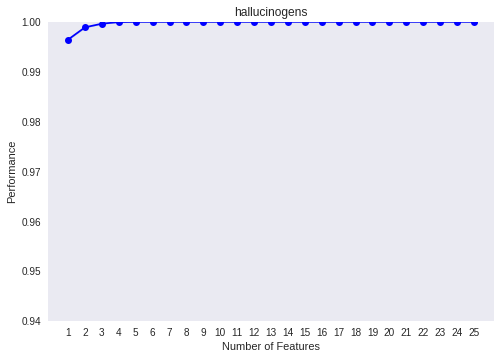

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


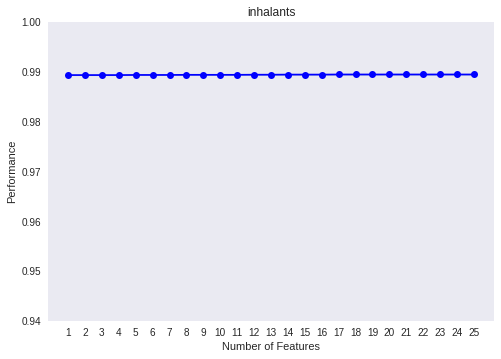

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


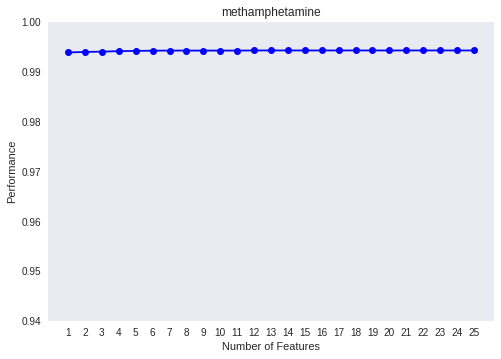

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


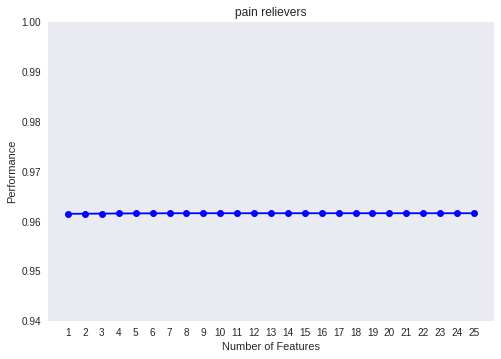

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


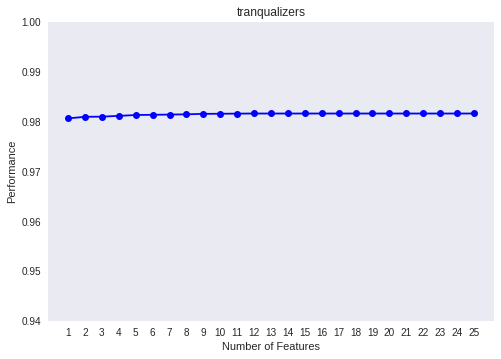

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


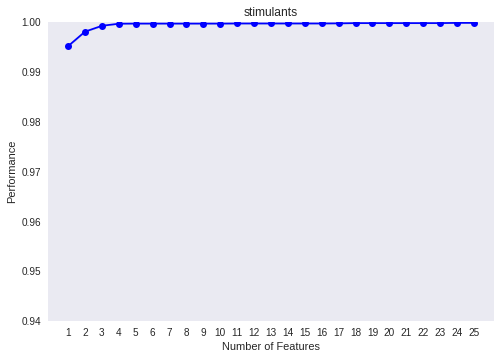

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


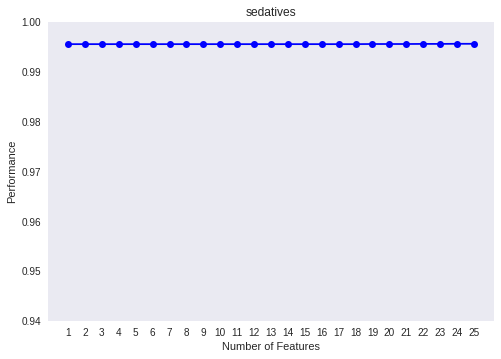

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


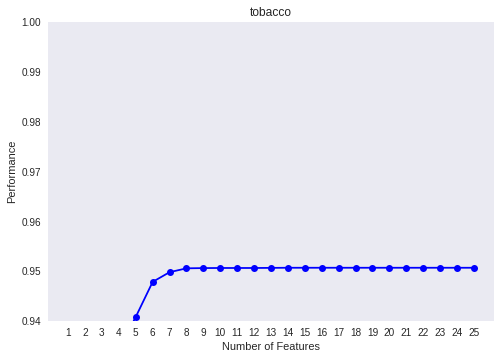

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


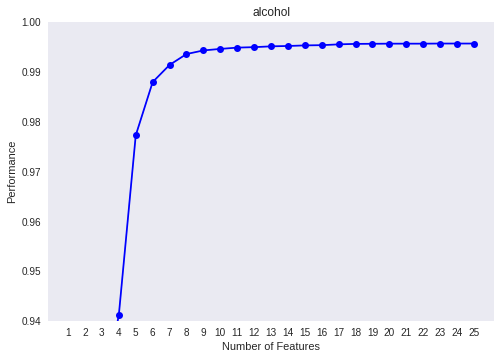

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


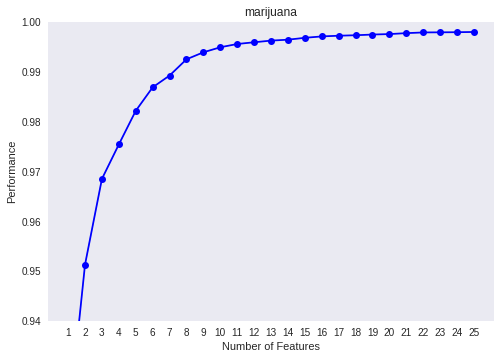

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


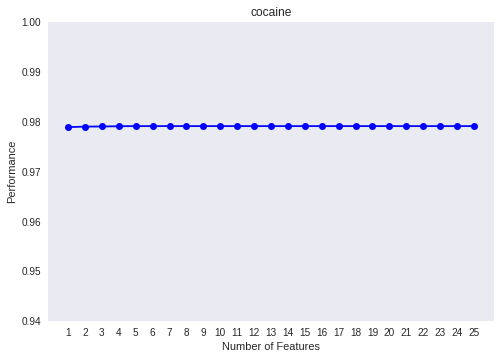

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


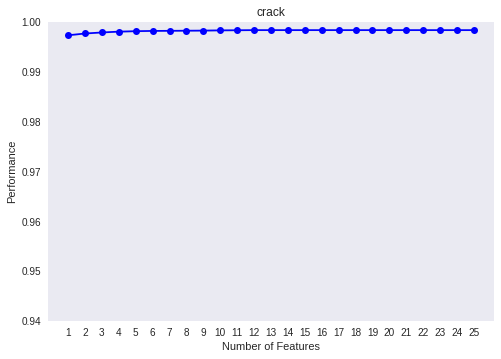

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


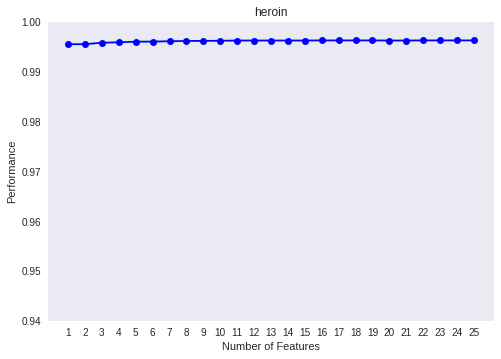

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


In [6]:
%mkdir  with_drug_data
for drug,col_name in zip(drugs,prefixes['targets']):
  
  train, test = train_test_split(data.drop([col for col in data.columns if col.startswith(tuple(prefixes[drug]))], axis=1))
  train_Ys = train[prefixes['targets']]
  train_Ys.to_csv('with_drug_data/' + drug + '_train_y.csv')
  train.drop(prefixes['targets'], axis=1, inplace=True)
  test_Ys = test[prefixes['targets']]
  train_Ys.to_csv('with_drug_data/' + drug + '_test_y.csv')
  test.drop(prefixes['targets'], axis=1, inplace=True)
  
  fa = FactorAnalysis(n_components=100)
  train = fa.fit_transform(train.values)
  test = fa.transform(test.values)
  
  clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000)
  
  selector = SFS(clf, forward=True, verbose=0, scoring='accuracy', cv=0,
                 n_jobs=-1, k_features=25).fit(train, train_Ys[col_name])
  
  fig = plot_sequential_feature_selection(selector.get_metric_dict(), kind='std_dev')
  plt.ylim([0.94, 1])
  plt.title(drug)
  plt.grid()
  plt.show()
  
  needed_features = selector.subsets_[25]['feature_idx']
  
  train = train[:, needed_features]
  np.savetxt('with_drug_data/' + drug + '_train.csv', train, delimiter=',')
  test = test[:, needed_features]
  np.savetxt('with_drug_data/' + drug + '_test.csv', test, delimiter=',') 
  
  print("SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED")

mkdir: cannot create directory ‘without_drug_data’: File exists


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.8s finished
Features: 2/15[

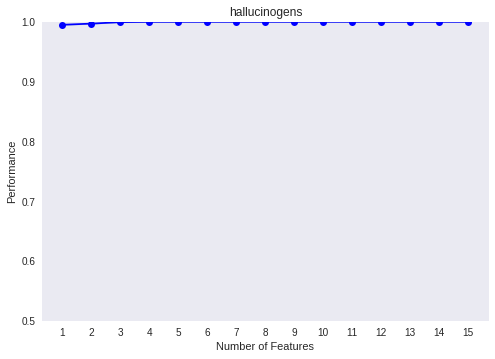

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    5.7s finished
Features: 2/15[

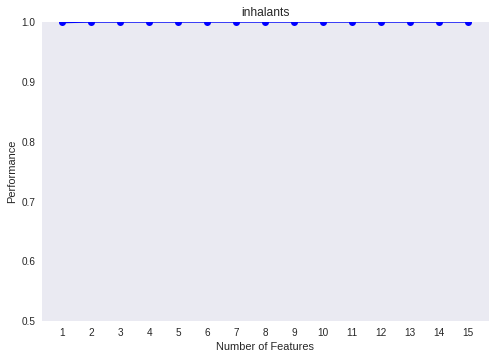

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.6s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: D

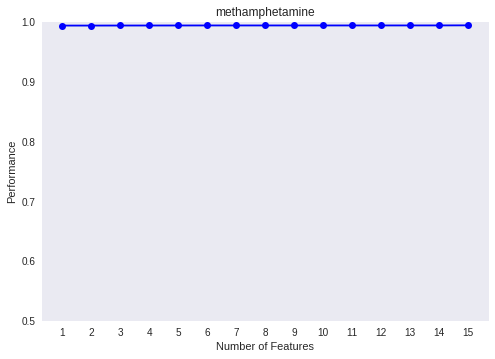

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  49 | elapsed:    3.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.0s finis

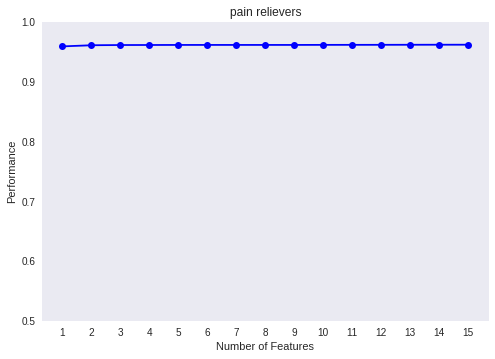

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  49 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    3.9s finis

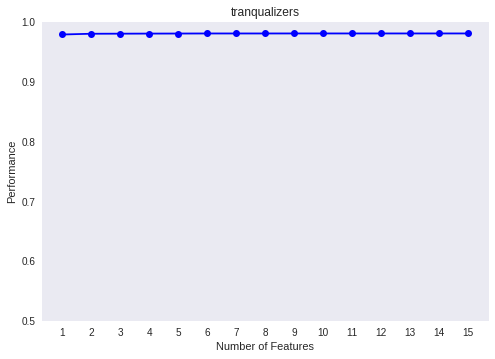

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.7s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.5s finished
Features: 2/15[

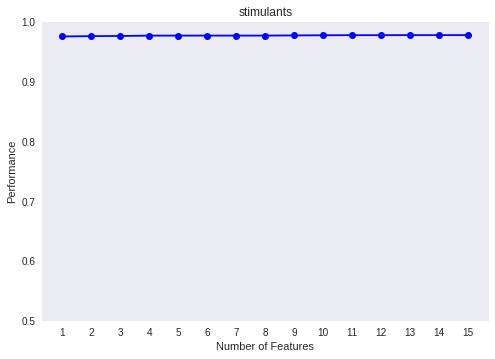

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.5s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    5.6s finished
Features: 2/15[

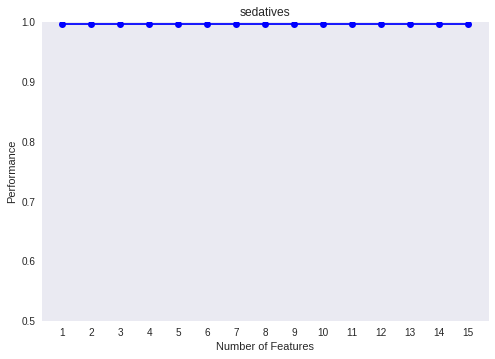

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.5s finished
Features: 2/15[

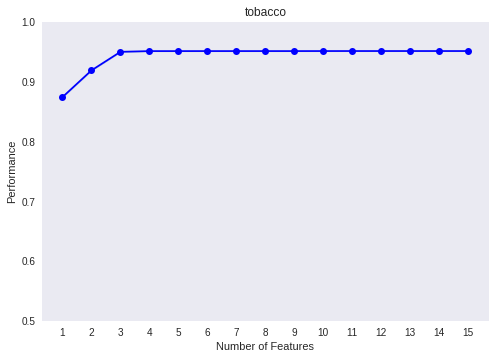

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  49 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.0s finis

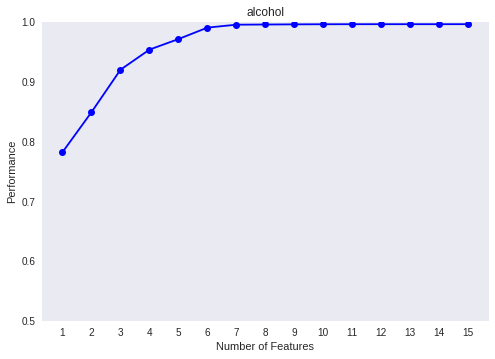

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  49 | elapsed:    4.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.1s finis

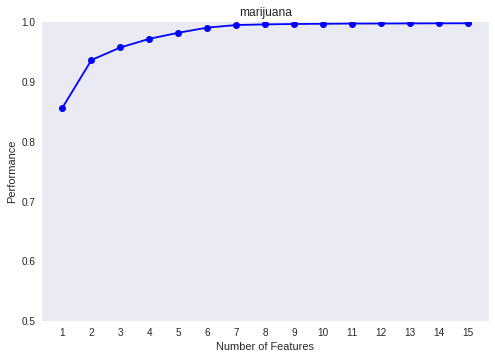

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.6s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: D

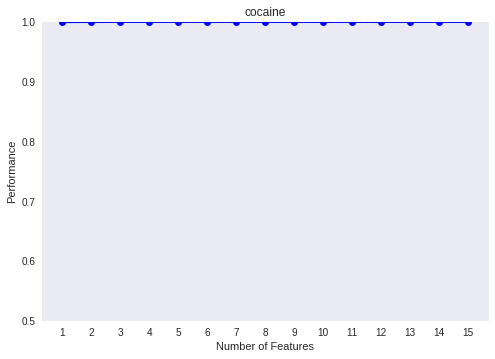

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    5.9s finished
Features: 2/15[

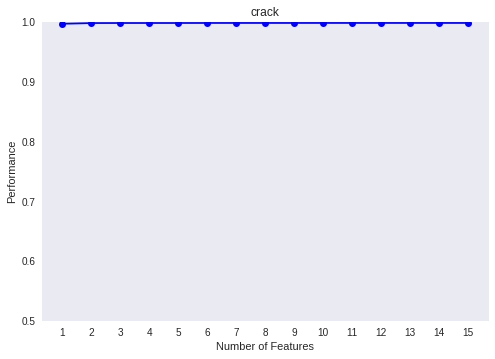

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  49 | elapsed:    4.7s remaining:    0.3s
[Para

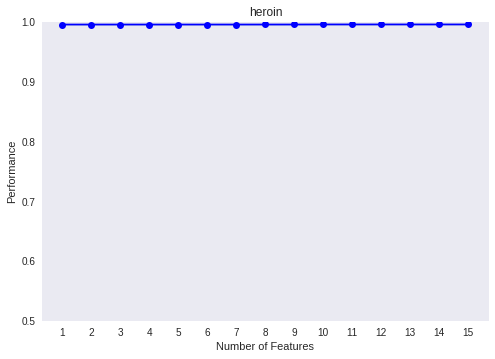

SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED


In [11]:
%mkdir  without_drug_data
  
data.drop([col for col in drug_cols if col not in prefixes['targets']], axis=1, inplace=True)
  
for drug,col_name in zip(drugs,prefixes['targets']):
  
  train, test = train_test_split(data)
  train_Ys = train[prefixes['targets']]
  train_Ys.to_csv('without_drug_data/' + drug + '_train_y.csv')
  train.drop(prefixes['targets'], axis=1, inplace=True)
  
  test_Ys = test[prefixes['targets']]
  train_Ys.to_csv('without_drug_data/' + drug + '_test_y.csv')
  test.drop(prefixes['targets'], axis=1, inplace=True)
  
  fa = FactorAnalysis(n_components=50)
  train = fa.fit_transform(train.values)
  test = fa.transform(test.values)
  
  clf = LogisticRegression(C=10, solver='lbfgs', max_iter = 1000)
  
  selector = SFS(clf, forward=True, verbose=1, scoring='accuracy', cv=0,
                 n_jobs=-1, k_features=15).fit(train, train_Ys[col_name])
  
  fig = plot_sequential_feature_selection(selector.get_metric_dict(), kind='std_dev')
  plt.ylim([0.50, 1])
  plt.title(drug)
  plt.grid()
  plt.show()
  
  needed_features = selector.subsets_[15]['feature_idx']
  
  train = train[:, needed_features]
  np.savetxt('without_drug_data/' + drug + '_train.csv', train, delimiter=',')
  test = test[:, needed_features]
  np.savetxt('without_drug_data/' + drug + '_test.csv', test, delimiter=',') 
  
  print("SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED=========SAVED")